# Project: Heart Disease Prediction (Dự đoán khả năng mắc bệnh tim)

## 1.1 Phát biểu bài toán
Bệnh tim là một trong những nguyên nhân hàng đầu gây tử vong trên thế giới, và việc chẩn đoán sớm có thể cứu sống nhiều người. Dự án này sử dụng tập dữ liệu Cleveland từ thư viện UCI Machine Learning Repository, bao gồm các thông tin về các bệnh nhân và các yếu tố có thể liên quan đến nguy cơ mắc bệnh tim.

Tập dữ liệu này bao gồm 303 bản ghi và 14 thuộc tính, bao gồm các chỉ số sức khỏe như tuổi tác, giới tính, mức độ cholesterol, huyết áp, tình trạng bệnh tim trước đó và các yếu tố nguy cơ khác. Mục tiêu là xây dựng một mô hình dự đoán khả năng mắc bệnh tim, phân loại bệnh nhân vào hai nhóm: có bệnh tim hoặc không có bệnh tim.

## 1.2 Mô tả vấn đề
Sử dụng tập dữ liệu Cleveland để xây dựng một mô hình học máy nhằm dự đoán khả năng mắc bệnh tim dựa trên các yếu tố nguy cơ. Mô hình sẽ phân loại các bệnh nhân thành hai nhóm: có bệnh tim hoặc không có bệnh tim.

##1.3 Giả thuyết
Một số yếu tố có thể ảnh hưởng đến khả năng mắc bệnh tim:

- Tuổi: Tuổi tác có thể ảnh hưởng lớn đến nguy cơ mắc bệnh tim, với người cao tuổi có nguy cơ mắc bệnh cao hơn.
- Cholesterol trong máu: Mức cholesterol cao có thể dẫn đến các vấn đề về tim mạch.
- Huyết áp: Huyết áp cao có thể làm tăng nguy cơ mắc bệnh tim.
- Loại đau ngực: Các cơn đau ngực có thể là dấu hiệu của bệnh tim.
- Tình trạng thalassemia: Đây là một yếu tố di truyền có thể ảnh hưởng đến sức khỏe tim mạch.
## 1.4 Các bước thực hiện
Bài toán Phân loại Nhị phân (Binary Classification)

### 1.4.1 General Overview: Tổng quan chung về dữ liệu
Dữ liệu có tổng cộng 303 bản ghi và 14 thuộc tính.
Các thuộc tính bao gồm các giá trị liên quan đến tình trạng sức khỏe và các yếu tố nguy cơ của bệnh nhân.
### 1.4.2 Exploratory Data Analysis (EDA): Phân tích dữ liệu thăm dò

Phân tích phân phối của các thuộc tính (histogram, boxplot).
Xác định các giá trị thiếu (missing values) và xử lý chúng.
Kiểm tra mối quan hệ giữa các thuộc tính và mục tiêu (Target) bằng các biểu đồ tương quan (correlation heatmap, scatter plot).
Phân tích số lượng bệnh nhân có bệnh tim và không có bệnh tim.

### 1.4.3 Data Preprocessing: Tiền xử lý dữ liệu
- Xử lý dữ liệu thiếu: Nếu có giá trị thiếu, sẽ có các phương pháp như loại bỏ dòng hoặc điền giá trị trung bình/mediana tùy vào tính chất dữ liệu.
- Chuyển đổi dữ liệu phân loại: Các thuộc tính phân loại (ví dụ: "Sex", "Chest pain type", "Thalassemia") cần được mã hóa thành các giá trị số (One-hot encoding hoặc Label Encoding).
- Chuẩn hóa dữ liệu: Các thuộc tính như huyết áp, cholesterol cần được chuẩn hóa để đưa về cùng một thang đo (sử dụng StandardScaler hoặc MinMaxScaler).

- Chia tập dữ liệu: Tách dữ liệu thành tập huấn luyện và tập kiểm tra (train-test split).

### 1.4.4 Model Building: Xây dựng mô hình học máy

Sử dụng các thuật toán học máy để xây dựng mô hình phân loại : 
- Decision Tree: Mô hình cây quyết định để hiểu rõ các yếu tố ảnh hưởng đến kết quả.
- Random Forest: Mô hình rừng ngẫu nhiên để tăng độ chính xác.
- Support Vector Machine (SVM): Mô hình SVM có thể rất hiệu quả với các dữ liệu không tuyến tính.

### 1.4.5 Hyperparameter Tuning: Điều chỉnh tham số mô hình

Sử dụng Grid Search hoặc Random Search để tìm kiếm các tham số tối ưu cho mô hình.
Điều chỉnh các tham số như số lượng cây trong Random Forest, tham số C trong SVM, hoặc mức độ sâu của cây quyết định.

### 1.4.6 Model Performance: Đánh giá hiệu suất mô hình

Accuracy: Tính toán độ chính xác của mô hình.
Precision, Recall, F1-score: Đánh giá mô hình theo các chỉ số này, đặc biệt trong trường hợp mất cân bằng lớp (class imbalance).
ROC Curve và AUC: Đánh giá mô hình qua đồ thị ROC và diện tích dưới đường cong (AUC).

###  1.4.7 Save the model: Lưu mô hình có hiệu suất tốt nhất

Sau khi tìm được mô hình tốt nhất, lưu mô hình sử dụng thư viện như joblib hoặc pickle để có thể tái sử dụng sau này.

### 1.4.8 Predictions: Đưa ra dự đoán trên tập dữ liệu kiểm tra

Sử dụng mô hình đã huấn luyện để đưa ra dự đoán trên tập kiểm tra.
Kiểm tra độ chính xác của mô hình dựa trên dữ liệu kiểm tra.

# 2. Tiến hành thực hiện

In [159]:
# import các thư viên cần thiết

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split


In [160]:
# đọc file dữ liệu

df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Tổng quan về dữ liệu
- age: Tuổi của bệnh nhân
- sex: Giới tính (1 = nam; 0 = nữ)
- cp: Loại đau ngực (1-4)
- trestbps: Huyết áp khi nghỉ ngơi
- chol: Cholesterol trong máu
- fbs: Đường huyết lúc đói (>120 mg/dl, 1 = đúng, 0 = sai)
- restecg: Kết quả điện tâm đồ khi nghỉ ngơi (0-2)
- thalach: Nhịp tim tối đa đạt được
- exang: Đau ngực do vận động (1 = có; 0 = không)
- oldpeak: ST depression so với khi nghỉ ngơi
- slope: Độ dốc của peak exercise ST segment
- ca: Số lượng mạch chính (0-3) được hiển thị
- thal: Tình trạng của thalassemia (3 = bình thường; 6 = lỗi cố định; 7 = lỗi hồi phục)
- target: mục tiêu 0,1,2,3 (1,2,3 = có nguy cơ bệnh tim, 0 = không)

In [161]:
# kiem tra xem co missing value khong
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


### Ta thấy các cột ca và thal có missing value
=> tiến hành xử lý missing value

In [162]:

# Xử lý missing value bằng cách điền giá trị trung bình vào các giá trị thiếu
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Ta có thể thấy target ở đây : 0 đại diện cho không bị bệnh tim và 1,2,3 đại diện cho bị bênh tim 
=> tiến hành chuẩn hoá về
-  0 là không mắc bệnh
- 1,2,3 cho về 1 là mặc bệnh

In [163]:
# Chuẩn target về 0 và 1
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [164]:
# kiểm tra có giá trị lặp hay không
duplicate = df.duplicated()
print(duplicate.sum())

0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


#### Ta có thể thấy mình đã xử lý thành công dữ liệu thiếu, và chuẩn hóa target và kiểu dữ liệu của các cột đều ở dạng số.


In [166]:
# Tính toán thống kê mô tả
description = df.describe()
print(description)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

1.1 Phân tích thống kê mô tả

-Tuổi (age): Tuổi trung bình của các bệnh nhân là khoảng 54 tuổi. Điều này cho thấy rằng bệnh tim có thể phổ biến hơn ở những người trung niên và người cao tuổi.

-Giới tính (sex): Giá trị trung bình của cột sex là khoảng 0.68, cho thấy rằng phần lớn các bệnh nhân trong dữ liệu là nam giới (giá trị 1 đại diện cho nam, 0 đại diện cho nữ).

-Loại đau ngực (cp): Loại đau ngực phổ biến nhất là loại 4 (giá trị trung bình gần 3). Điều này có thể cho thấy rằng loại đau ngực này có liên quan mạnh đến bệnh tim.

-Huyết áp khi nghỉ ngơi (trestbps): Huyết áp trung bình khi nghỉ ngơi là khoảng 131 mmHg. Điều này cho thấy rằng nhiều bệnh nhân có huyết áp cao, một yếu tố nguy cơ của bệnh tim.

-Cholesterol (chol): Mức cholesterol trung bình là khoảng 246 mg/dl, cho thấy rằng nhiều bệnh nhân có mức cholesterol cao, một yếu tố nguy cơ của bệnh tim.

-Đường huyết lúc đói (fbs): Giá trị trung bình của cột fbs là khoảng 0.15, cho thấy rằng phần lớn các bệnh nhân không có mức đường huyết lúc đói cao (giá trị 1 đại diện cho mức đường huyết lúc đói > 120 mg/dl).

-Nhịp tim tối đa đạt được (thalach): Nhịp tim tối đa trung bình đạt được là khoảng 149 bpm. Điều này cho thấy rằng nhịp tim tối đa có thể là một yếu tố quan trọng trong việc xác định nguy cơ mắc bệnh tim.

-Bài tập gây đau ngực (exang): Giá trị trung bình của cột exang là khoảng 0.33, cho thấy rằng một số bệnh nhân trải qua đau ngực khi tập thể dục.

-ST depression (oldpeak): Giá trị trung bình của cột oldpeak là khoảng 1.04, cho thấy rằng nhiều bệnh nhân có mức độ giảm ST khi tập thể dục so với khi nghỉ ngơi.

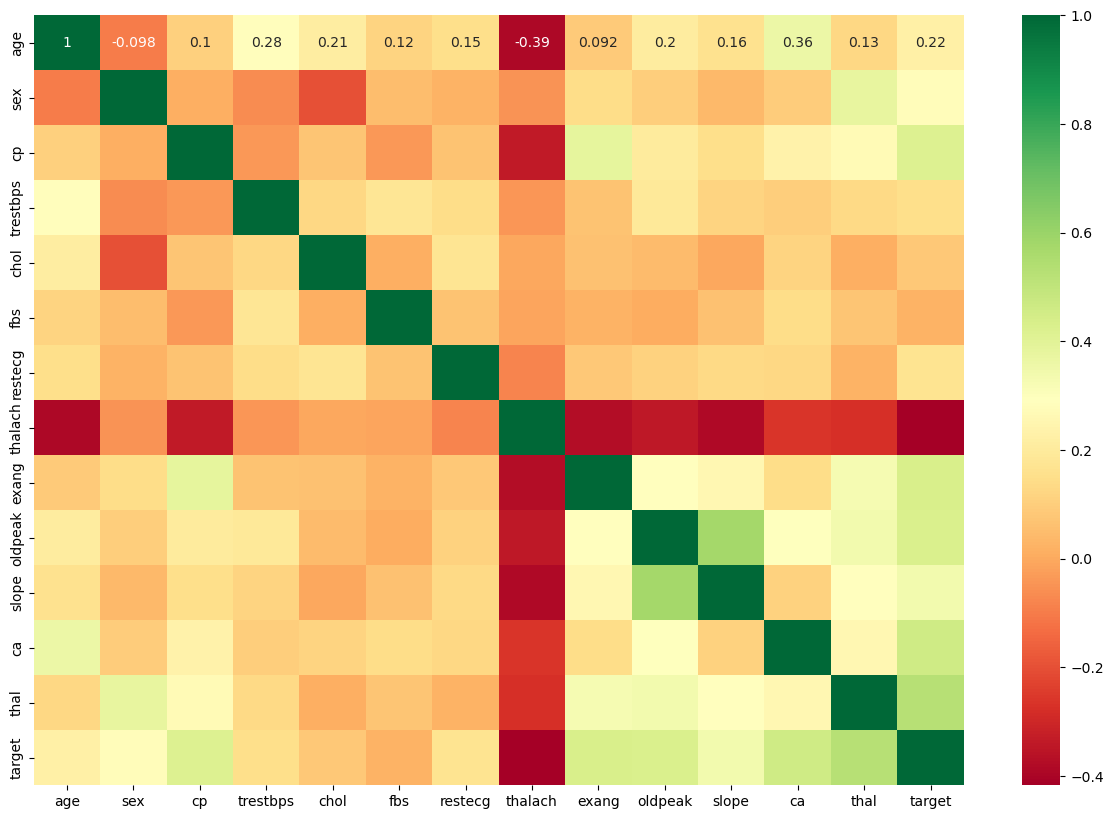

In [167]:
# ve ma trận tương quan
corr = df.corr()
plt.figure(figsize=(15,10 ))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()


### Đánh giá mức độ tương quan của cá feature với nhau.
- slope và oldpeak có mức độ tương quan cao => có thể chỉ ra sự trùng lặp thông tin hoặc đa cộng tuyến, đặc biệt nếu cả hai biến đó không phải là biến mục tiêu => tiến hành loại bỏ .


In [168]:
# loại bỏ feater không cần thiết
df = df.drop([ "slope", "oldpeak"], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


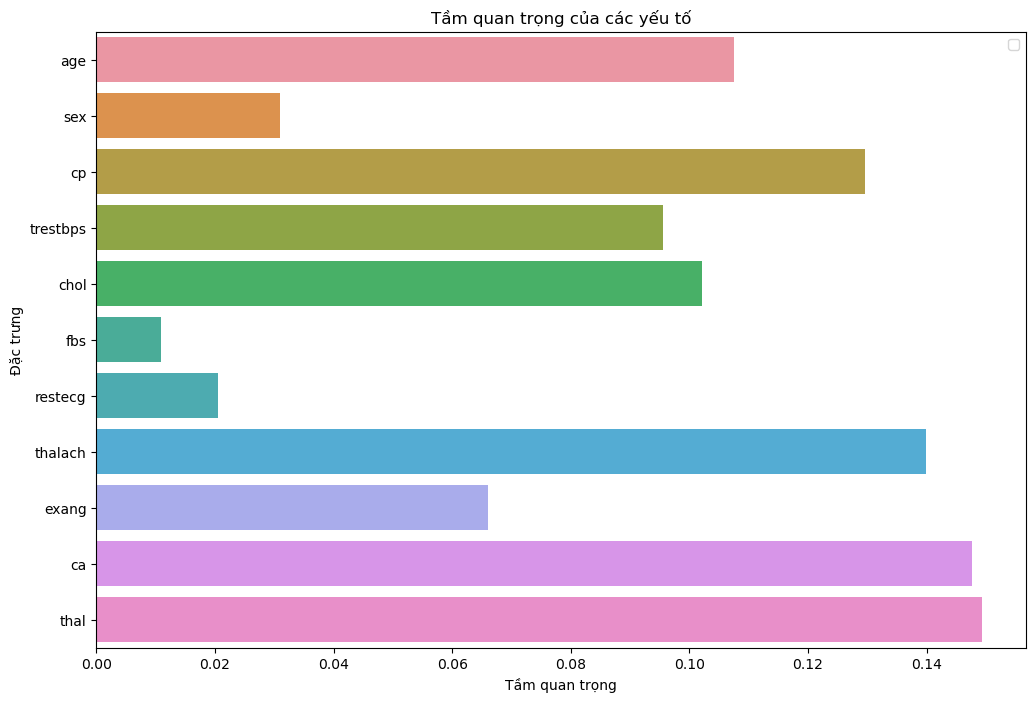

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Giả sử df đã được định nghĩa và xử lý trước đó
X = df.iloc[:, :-1]
y = df['target']

# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Lấy tầm quan trọng của đặc trưng
feature_importances = rf.feature_importances_

# Tính toán các thống kê mô tả cho tầm quan trọng
mean_importance = np.mean(feature_importances)
median_importance = np.median(feature_importances)
q1_importance = np.percentile(feature_importances, 25)

# Chọn ngưỡng tối ưu (ví dụ: phân vị thứ 25)
threshold = q1_importance
# Vẽ biểu đồ tầm quan trọng của các yếu tố
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Tầm quan trọng của các yếu tố')
plt.xlabel('Tầm quan trọng')
plt.ylabel('Đặc trưng')
plt.legend()
plt.show()

### Loại bỏ  3  feature có mức ảnh hướng thấp để dự đoán chính xác  người đó có khả năng mắc bệnh tim hay không 
- fbs
- restecg
- sex


In [170]:
# loại bỏ các feature không dùng đến
df = df.drop(['sex', 'restecg', 'fbs'], axis=1)

In [171]:
df.head()

,age,cp,trestbps,chol,thalach,exang,ca,thal,target
0,63,1,145,233,150,0,0.0,6.0,0
1,67,4,160,286,108,1,3.0,3.0,1
2,67,4,120,229,129,1,2.0,7.0,1
3,37,3,130,250,187,0,0.0,3.0,0
4,41,2,130,204,172,0,0.0,3.0,0


## Exploratory Data Analysis (EDA) : Thực hiện Phân tích dữ liệu thăm dò (EDA) để có những hiểu biết rõ ràng hơn về dữ liệu

target
0    164
1    139
Name: count, dtype: int64


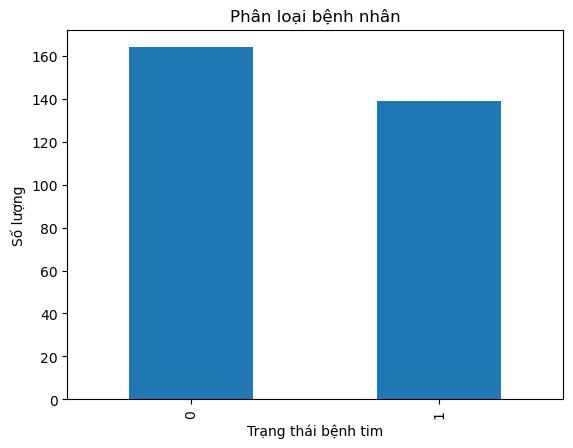

In [173]:
# Đếm số lượng bệnh nhân theo nhóm
target_count = df['target'].value_counts()
print(target_count)
target_count.plot(kind='bar')
plt.title('Phân loại bệnh nhân')
plt.xlabel('Trạng thái bệnh tim')
plt.ylabel('Số lượng')
plt.show()

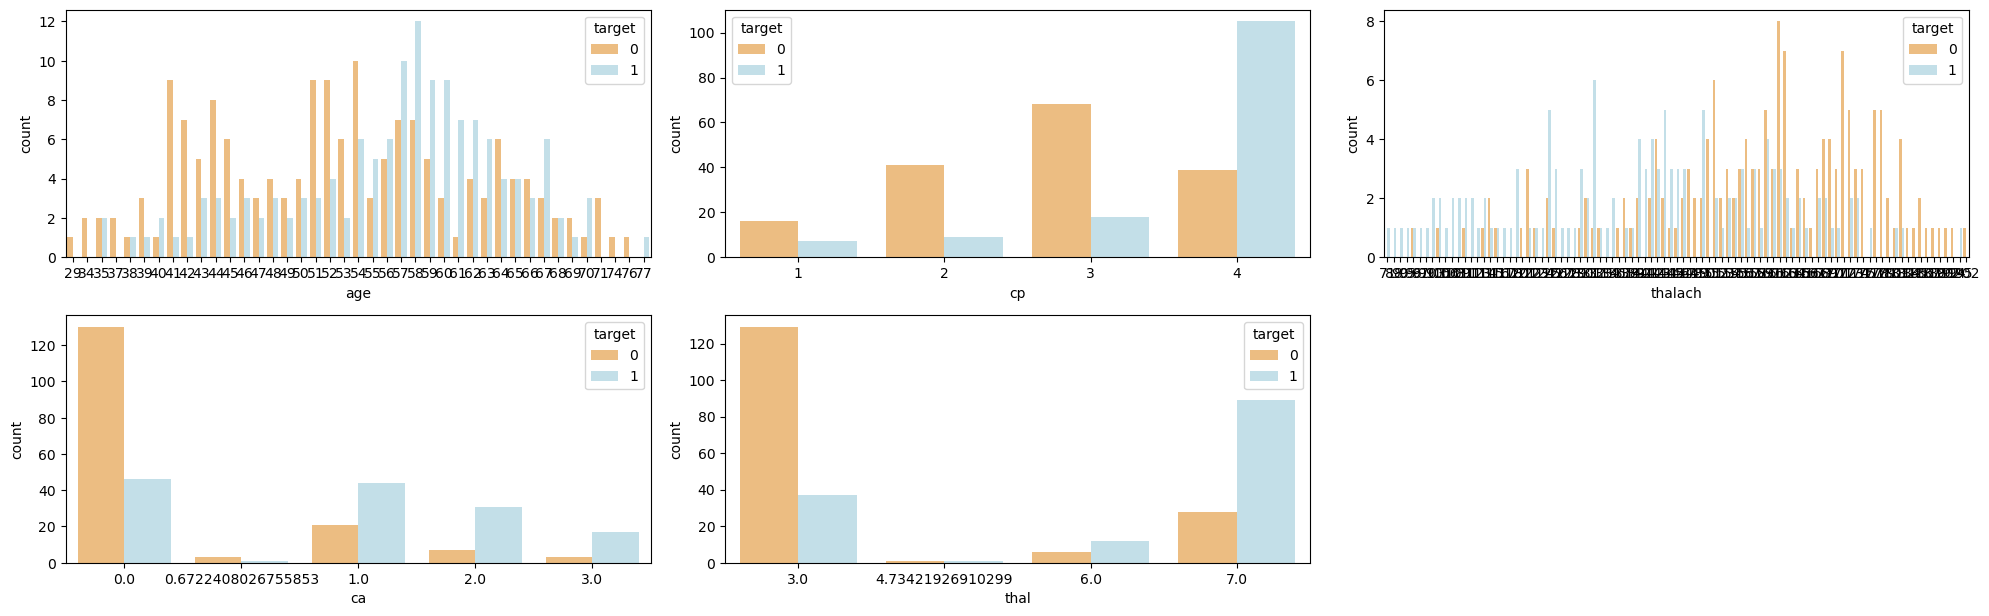

In [174]:

# barplot
cast_list = ['age',	'cp', 'thalach', 'ca', 'thal' ]

# Ensure 'target' is treated as a categorical variable
df['target'] = df['target'].astype(str)

fig = plt.figure(figsize=(20, 15))

for i in range(len(cast_list)):
    column = cast_list[i]
    sub = fig.add_subplot(5, 3, i + 1)
    chart = sns.countplot(data=df, x=column, hue='target', palette='RdYlBu')

plt.tight_layout()
plt.show()
    

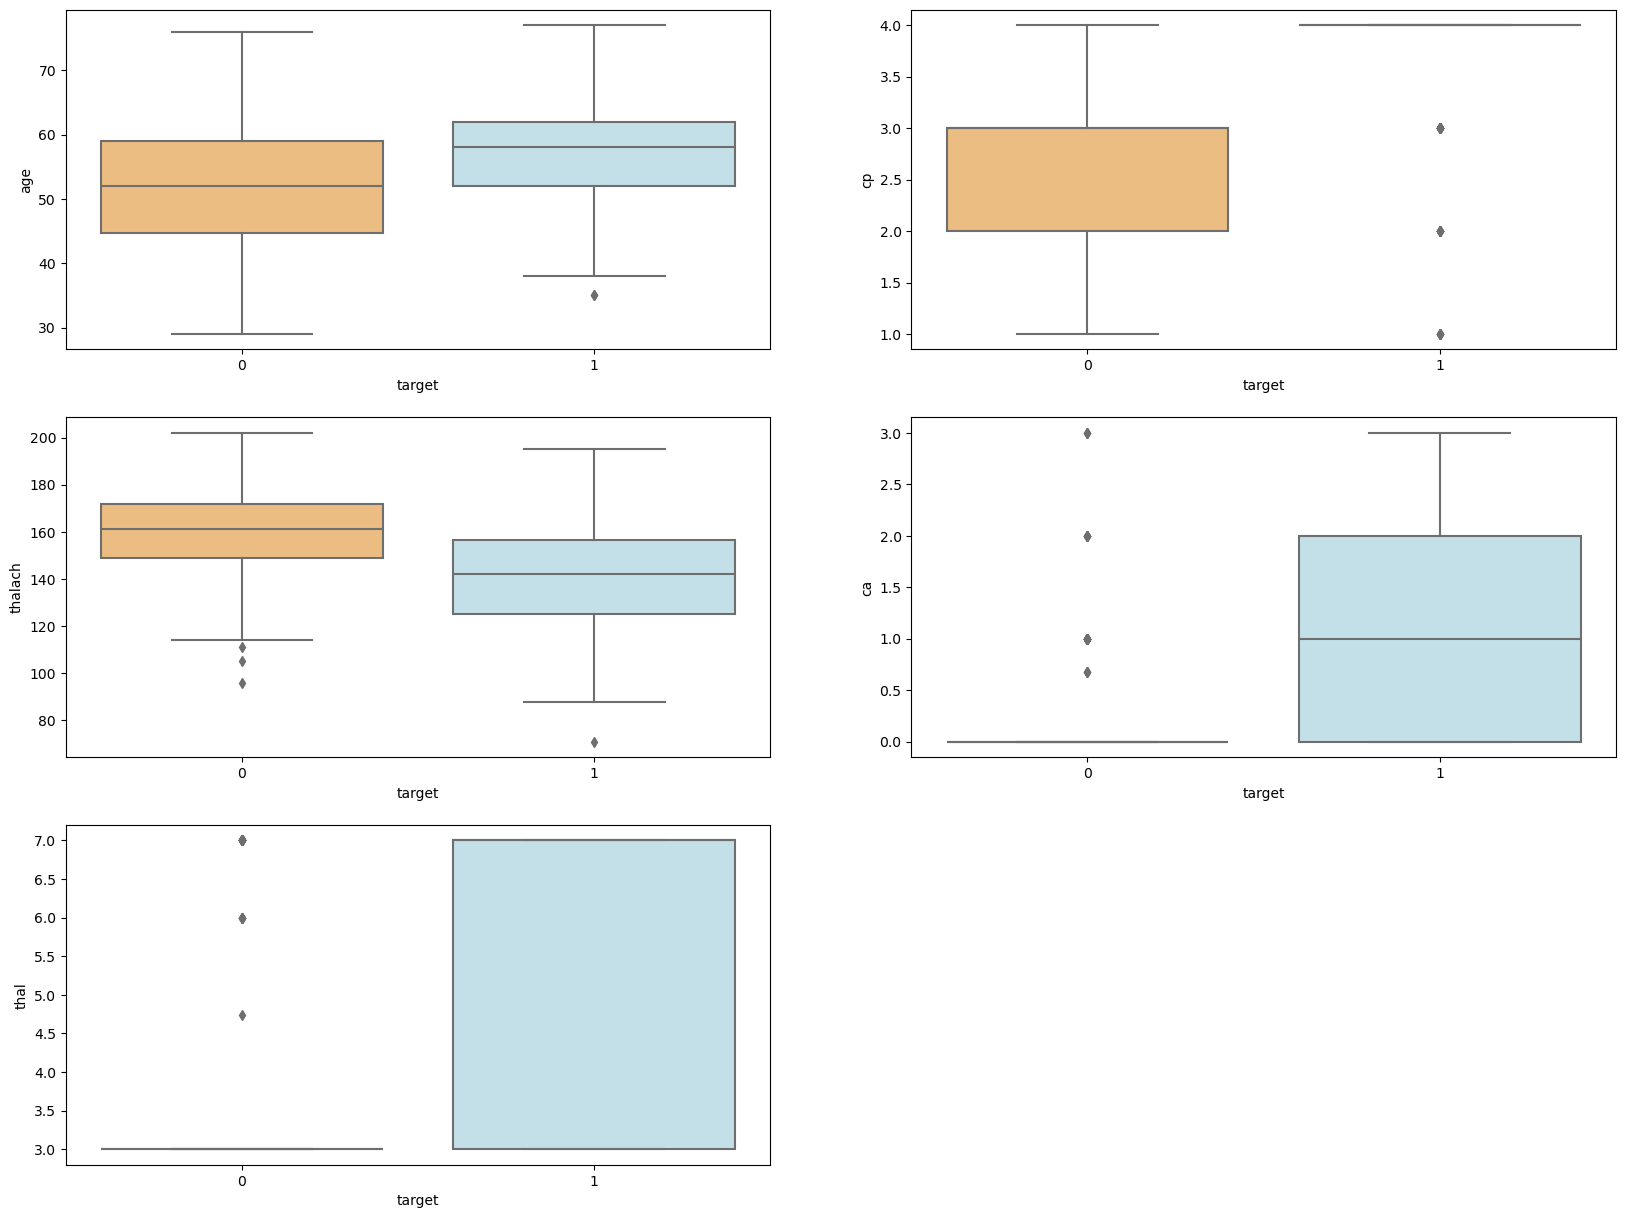

In [175]:

# boxplot
num_list = ['age',	'cp', 'thalach', 'ca', 'thal' ]
fig = plt.figure(figsize=(20, 15))
for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(3, 2, i + 1)
    sns.boxplot(data=df, x='target', y=column, palette='RdYlBu')

3 .Model Building: Sau khi dữ liệu được xử lý, sử dụng dữ liệu này để xây dựng mô hình Học
 máy

In [176]:
# 1. Tách dữ liệu thành đặc trưng (features) và nhãn (labels) 
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#3. Chuẩn hóa dữ liệu (Standardization)
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3.1 Ở đây e sẽ sử dụng các thuật toán Decision tree, Random forest, SVM , để xem xét thuật toán nào sẽ cho ra được đồ chính xác cao nhất phù hợp với dự liệu.

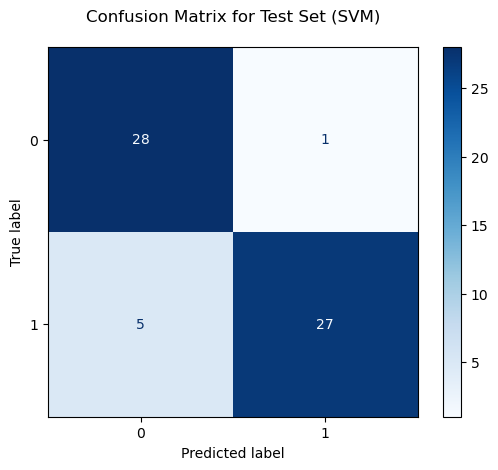

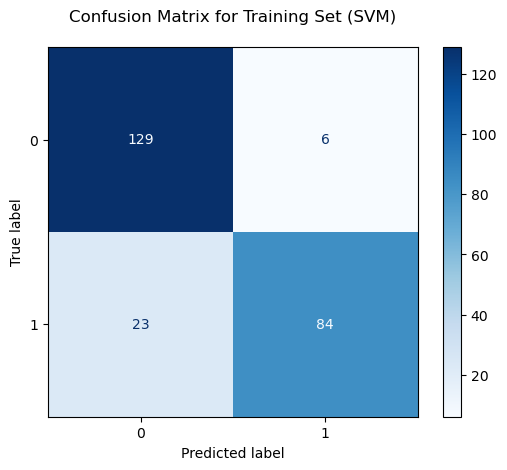

Accuracy for training set for SVC = 0.88
Accuracy for test set for SVC = 0.9

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       135
           1       0.93      0.79      0.85       107

    accuracy                           0.88       242
   macro avg       0.89      0.87      0.88       242
weighted avg       0.89      0.88      0.88       242



In [177]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa và huấn luyện mô hình SVM
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

# Dự đoán trên tập test và tập train
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# Tính toán và hiển thị confusion matrix cho tập test
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set (SVM)\n')
plt.show()

# Tính toán và hiển thị confusion matrix cho tập train
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set (SVM)\n')
plt.show()

# Tính toán và in ra độ chính xác
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))

# In ra báo cáo phân loại (classification report)
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))



<Figure size 1000x600 with 0 Axes>

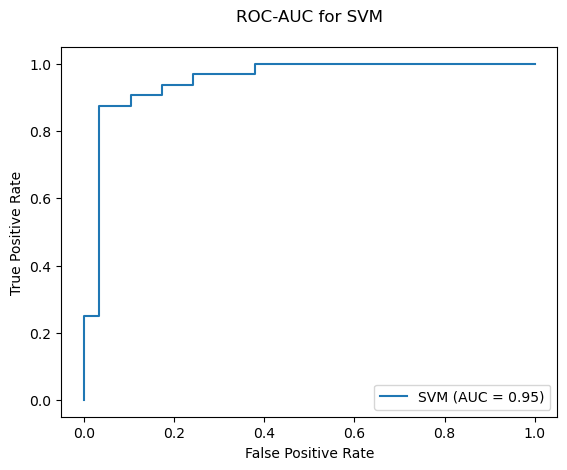

In [178]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Vẽ biểu đồ ROC cho mô hình SVM trên tập kiểm tra
y_score_test = classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score_test, pos_label='1')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM')
roc_display.plot()
plt.title('ROC-AUC for SVM\n')
plt.show()

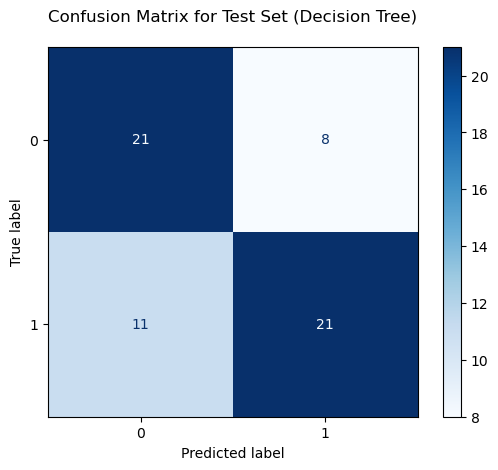

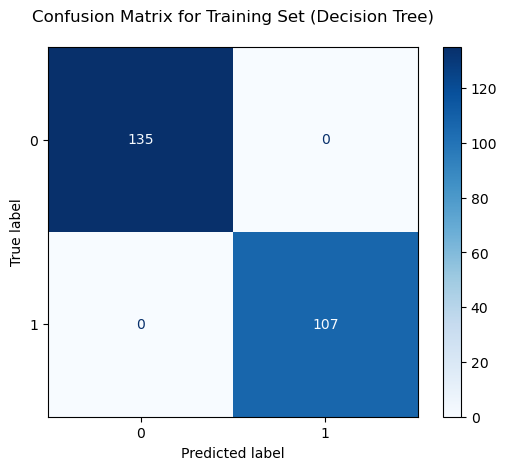

Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.69

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        29
           1       0.72      0.66      0.69        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       107

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [179]:
#########################################   Decision Tree  #############################################################
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa và huấn luyện mô hình Decision Tree
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

# Dự đoán trên tập test và tập train
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# Confusion matrix cho tập test
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set (Decision Tree)\n')
plt.show()

# Confusion matrix cho tập train
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set (Decision Tree)\n')
plt.show()

# Tính toán và in ra độ chính xác
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))

# In ra báo cáo phân loại (classification report)
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))



<Figure size 1000x600 with 0 Axes>

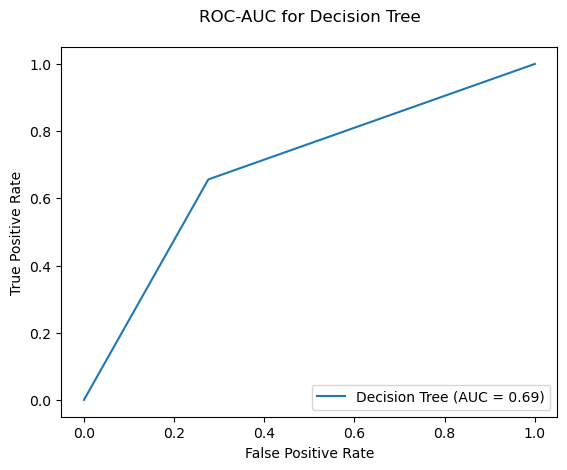

In [180]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Tính toán xác suất dự đoán cho tập test
y_pred_proba_test = classifier.predict_proba(X_test)[:, 1]

# Chuyển đổi y_test thành số nguyên
y_test_int = y_test.astype(int)

# Tính toán ROC curve
fpr, tpr, _ = roc_curve(y_test_int, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(10, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
roc_display.plot()
plt.title('ROC-AUC for Decision Tree\n')
plt.show()

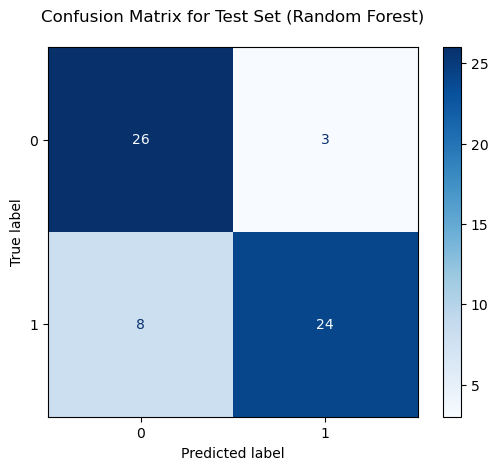

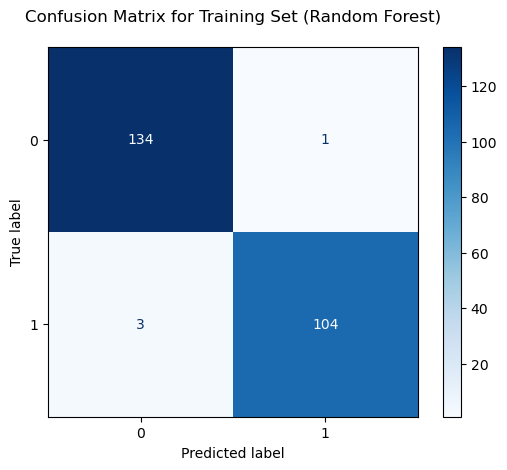

Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.82

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       135
           1       0.99      0.97      0.98       107

    accuracy                           0.98       242
   macro avg       0.98      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242



In [181]:
#########################################  Random Forest  ############################################################
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa và huấn luyện mô hình Random Forest
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
classifier.fit(X_train, y_train)

# Dự đoán trên tập test và tập train
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# Confusion matrix cho tập test
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set (Random Forest)\n')
plt.show()

# Confusion matrix cho tập train
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set (Random Forest)\n')
plt.show()

# Tính toán và in ra độ chính xác
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))

# In ra báo cáo phân loại (classification report)
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))


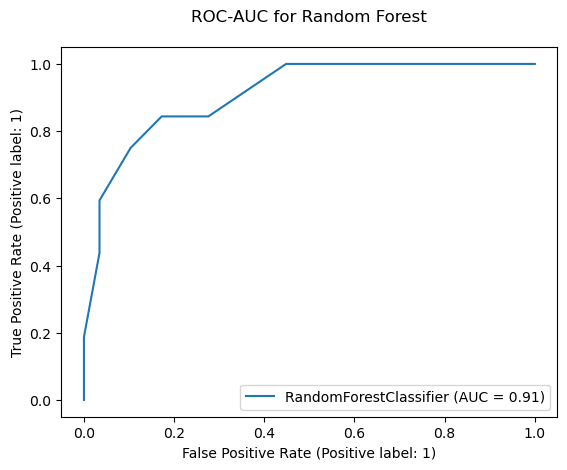

In [182]:
from sklearn.metrics import RocCurveDisplay

# Vẽ biểu đồ ROC cho mô hình RandomForestClassifier trên tập kiểm tra
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.title('ROC-AUC for Random Forest\n')
plt.show()
